In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

import os
os.chdir="c:\\users\\hp\\downloads"

### Read the dataset from Excel file

In [20]:
dataset = pd.read_excel('compactiv.xlsx')

### Copy dataset in df

In [21]:
df = dataset.copy()

### View top 5 rows of the dataset

In [22]:
df.head()

lread  lwrite  scall  sread  swrite  fork  exec    rchar    wchar  pgout  \
0      1       0   2147     79      68   0.2   0.2  40671.0  53995.0    0.0   
1      0       0    170     18      21   0.2   0.2    448.0   8385.0    0.0   
2     15       3   2162    159     119   2.0   2.4      NaN  31950.0    0.0   
3      0       0    160     12      16   0.2   0.2      NaN   8670.0    0.0   
4      5       1    330     39      38   0.4   0.4      NaN  12185.0    0.0   

   ppgout  pgfree  pgscan  atch  pgin  ppgin    pflt    vflt         runqsz  \
0     0.0     0.0     0.0   0.0   1.6    2.6   16.00   26.40      CPU_Bound   
1     0.0     0.0     0.0   0.0   0.0    0.0   15.63   16.83  Not_CPU_Bound   
2     0.0     0.0     0.0   1.2   6.0    9.4  150.20  220.20  Not_CPU_Bound   
3     0.0     0.0     0.0   0.0   0.2    0.2   15.60   16.80  Not_CPU_Bound   
4     0.0     0.0     0.0   0.0   1.0    1.2   37.80   47.60  Not_CPU_Bound   

   freemem  freeswap  usr  
0     4670   1730946   95  
1     7278   1869002   97  
2      702   1021237   87  
3     7248   1863704   98  
4      633   1760253   90

### Check shape of the dataset (number of rows/observations, number of columns/variables/features)

In [23]:
df.shape

(8192, 22)

### Check basic information of the dataset

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   lread     8192 non-null   int64  
 1   lwrite    8192 non-null   int64  
 2   scall     8192 non-null   int64  
 3   sread     8192 non-null   int64  
 4   swrite    8192 non-null   int64  
 5   fork      8192 non-null   float64
 6   exec      8192 non-null   float64
 7   rchar     8088 non-null   float64
 8   wchar     8177 non-null   float64
 9   pgout     8192 non-null   float64
 10  ppgout    8192 non-null   float64
 11  pgfree    8192 non-null   float64
 12  pgscan    8192 non-null   float64
 13  atch      8192 non-null   float64
 14  pgin      8192 non-null   float64
 15  ppgin     8192 non-null   float64
 16  pflt      8192 non-null   float64
 17  vflt      8192 non-null   float64
 18  runqsz    8192 non-null   object 
 19  freemem   8192 non-null   int64  
 20  freeswap  8192 non-null   int6

### <font color='blue'>There are 22 features. One has data type as 'Object' and other 21 are numeric Iint or float).There are some null values in rchar and wchar features.  </font>

### Check exact number of null values

In [25]:
df.isnull().sum()[df.isnull().sum()>0]

rchar    104
wchar     15
dtype: int64

### Impute median in place of null values

In [26]:
for i in ['rchar','wchar']:
    df[i] = df[i].fillna(df[i].median(), axis=0)

### Check for null values again

In [27]:
df.isnull().sum()[df.isnull().sum()>0]

Series([], dtype: int64)

### <font color='blue'> No null values now</font>

### Check for duplicates

In [28]:
df.duplicated().sum()

0

### Check basic statistical information of the dataset

In [29]:
df.describe().T

count          mean            std     min         25%        50%  \
lread     8192.0  1.955969e+01      53.353799     0.0        2.00        7.0   
lwrite    8192.0  1.310620e+01      29.891726     0.0        0.00        1.0   
scall     8192.0  2.306318e+03    1633.617322   109.0     1012.00     2051.5   
sread     8192.0  2.104800e+02     198.980146     6.0       86.00      166.0   
swrite    8192.0  1.500582e+02     160.478980     7.0       63.00      117.0   
fork      8192.0  1.884554e+00       2.479493     0.0        0.40        0.8   
exec      8192.0  2.791998e+00       5.212456     0.0        0.20        1.2   
rchar     8192.0  1.964728e+05  238446.012054   278.0    34860.50   125473.5   
wchar     8192.0  9.581275e+04  140728.464118  1498.0    22977.75    46619.0   
pgout     8192.0  2.285317e+00       5.307038     0.0        0.00        0.0   
ppgout    8192.0  5.977229e+00      15.214590     0.0        0.00        0.0   
pgfree    8192.0  1.191971e+01      32.363520     0.0        0.00        0.0   
pgscan    8192.0  2.152685e+01      71.141340     0.0        0.00        0.0   
atch      8192.0  1.127505e+00       5.708347     0.0        0.00        0.0   
pgin      8192.0  8.277960e+00      13.874978     0.0        0.60        2.8   
ppgin     8192.0  1.238859e+01      22.281318     0.0        0.60        3.8   
pflt      8192.0  1.097938e+02     114.419221     0.0       25.00       63.8   
vflt      8192.0  1.853158e+02     191.000603     0.2       45.40      120.4   
freemem   8192.0  1.763456e+03    2482.104511    55.0      231.00      579.0   
freeswap  8192.0  1.328126e+06  422019.426957     2.0  1042623.50  1289289.5   
usr       8192.0  8.396887e+01      18.401905     0.0       81.00       89.0   

                  75%         max  
lread          20.000     1845.00  
lwrite         10.000      575.00  
scall        3317.250    12493.00  
sread         279.000     5318.00  
swrite        185.000     5456.00  
fork            2.200       20.12  
exec            2.800       59.56  
rchar      265394.750  2526649.00  
wchar      106037.000  1801623.00  
pgout           2.400       81.44  
ppgout          4.200      184.20  
pgfree          5.000      523.00  
pgscan          0.000     1237.00  
atch            0.600      211.58  
pgin            9.765      141.20  
ppgin          13.800      292.61  
pflt          159.600      899.80  
vflt          251.800     1365.00  
freemem      2002.250    12027.00  
freeswap  1730379.500  2243187.00  
usr            94.000       99.00

### Get labels of all numeric features in a list

In [30]:
num_var = []
for i in df.columns:
    if df[i].dtypes!='object':
        num_var.append(i)
        
num_var

['lread',
 'lwrite',
 'scall',
 'sread',
 'swrite',
 'fork',
 'exec',
 'rchar',
 'wchar',
 'pgout',
 'ppgout',
 'pgfree',
 'pgscan',
 'atch',
 'pgin',
 'ppgin',
 'pflt',
 'vflt',
 'freemem',
 'freeswap',
 'usr']

### Check percentage of value '0' (zero) in every feature

In [31]:
var=[]
zero=[]

for i in num_var:
    v =  round(df[i].value_counts(normalize=True)*100,2)
    var.append(i)
    zero.append(v[v.index==0].values)    
    
zeros = pd.DataFrame(zip(var, zero), columns=['Feature','%age of zero'])
zeros

Feature %age of zero
0      lread       [8.24]
1     lwrite      [32.76]
2      scall           []
3      sread           []
4     swrite           []
5       fork       [0.26]
6       exec       [0.26]
7      rchar           []
8      wchar           []
9      pgout      [59.55]
10    ppgout      [59.55]
11    pgfree      [59.44]
12    pgscan      [78.71]
13      atch      [55.85]
14      pgin      [14.89]
15     ppgin      [14.89]
16      pflt       [0.04]
17      vflt           []
18   freemem           []
19  freeswap           []
20       usr       [3.45]

### Bar plot showing top 10 recurring values in all features

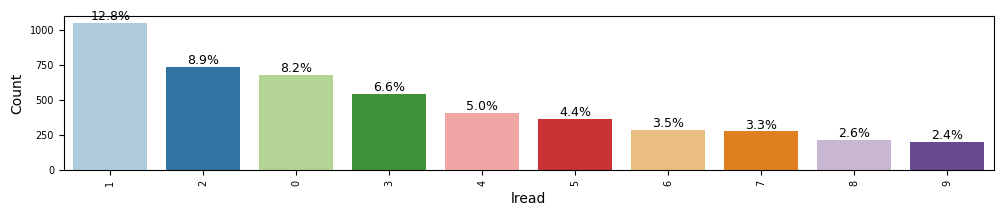

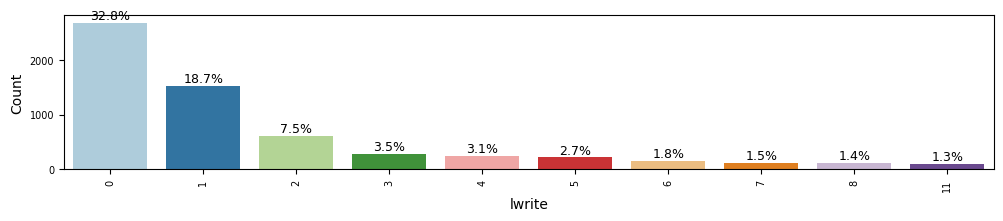

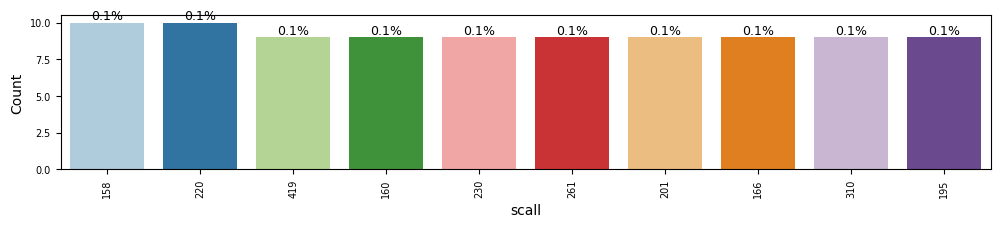

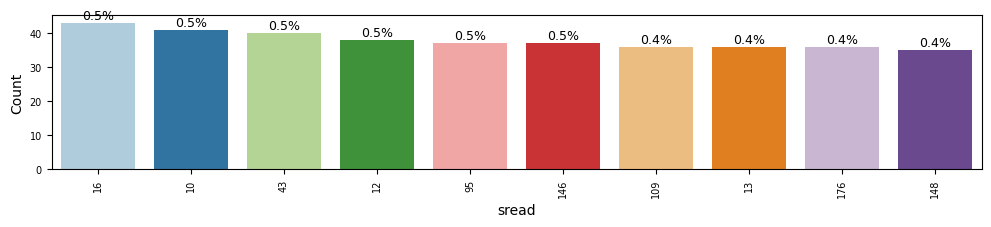

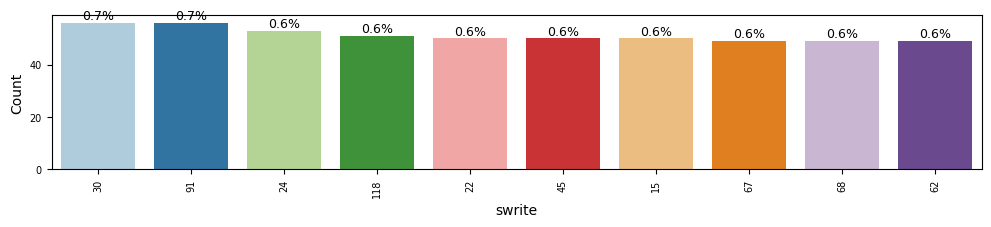

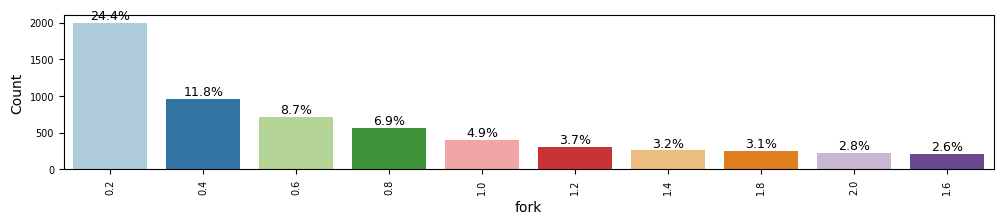

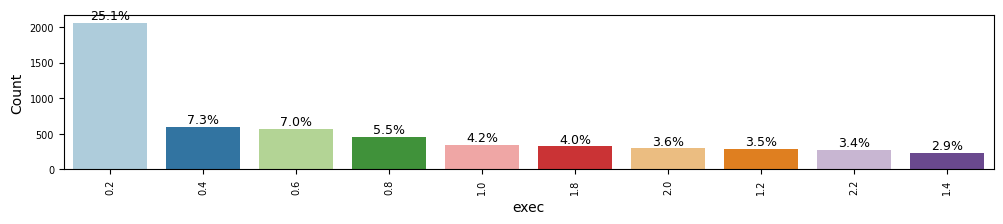

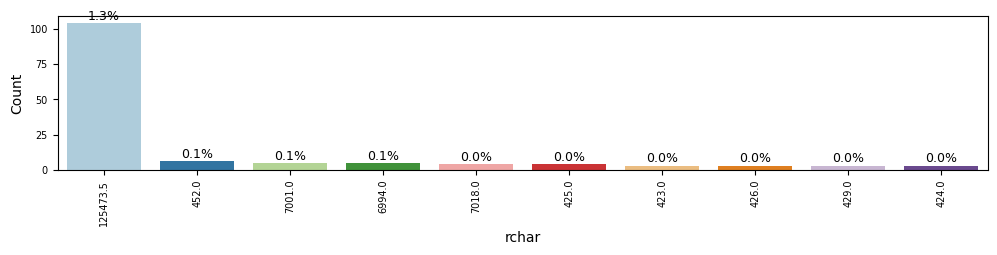

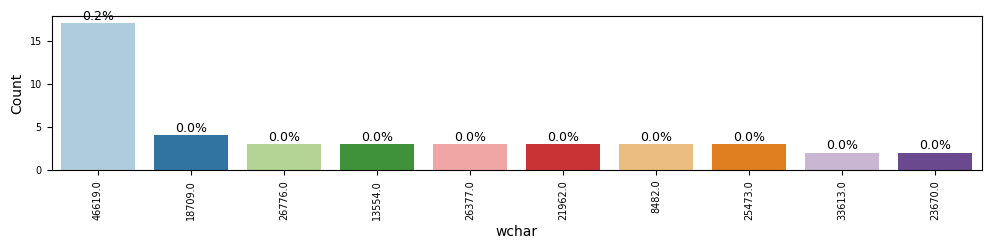

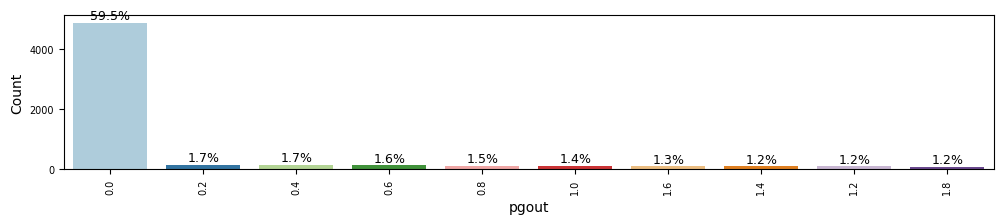

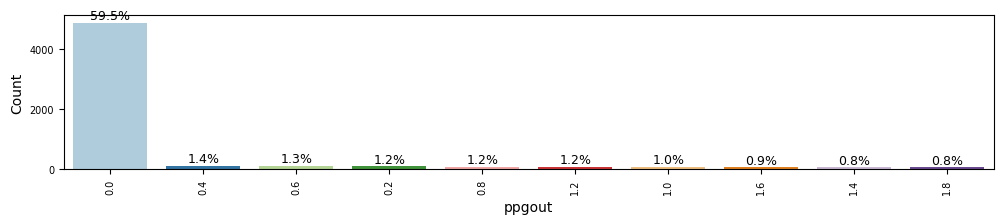

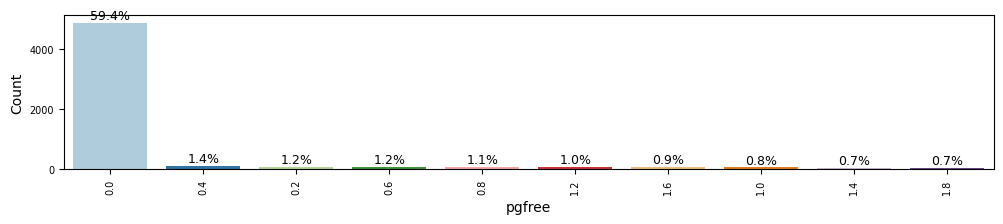

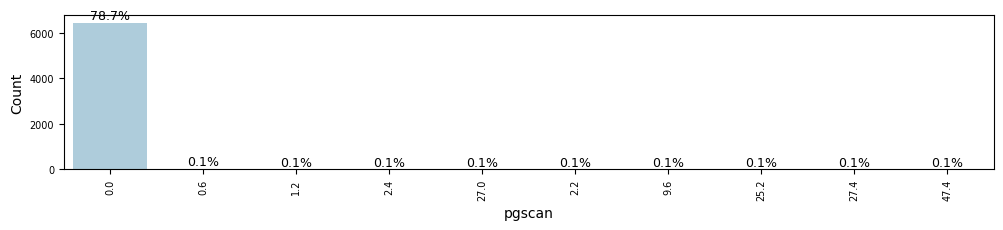

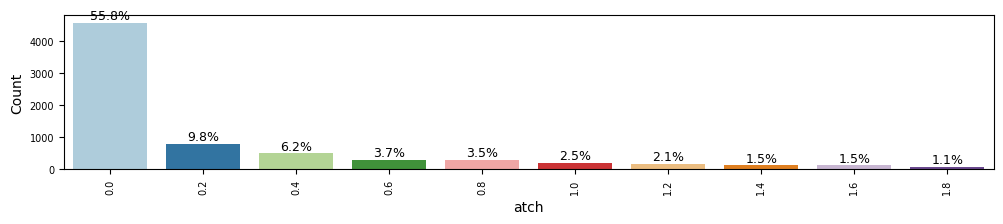

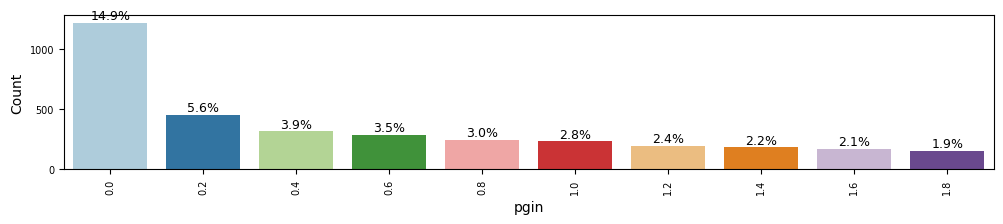

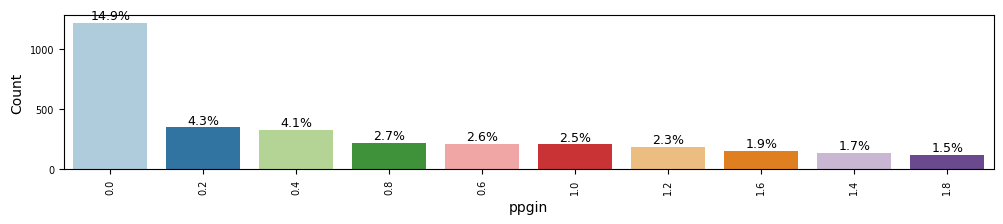

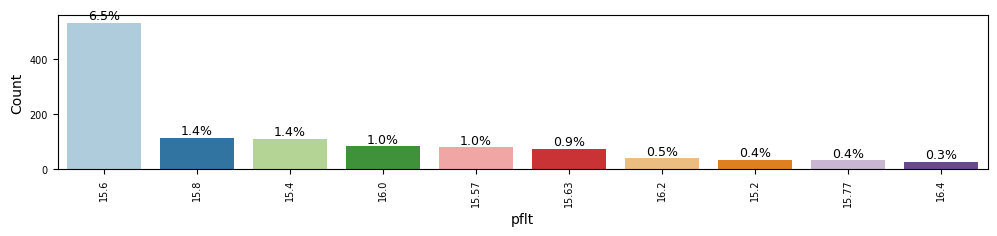

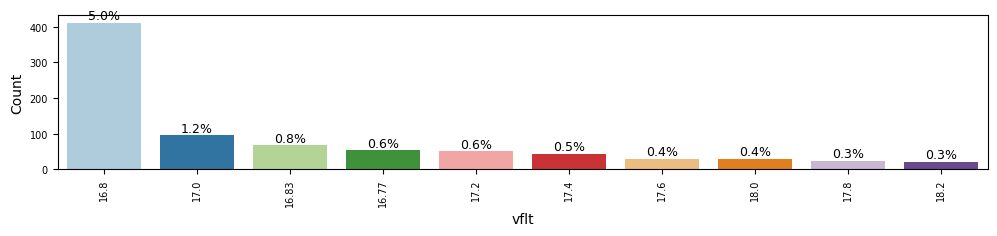

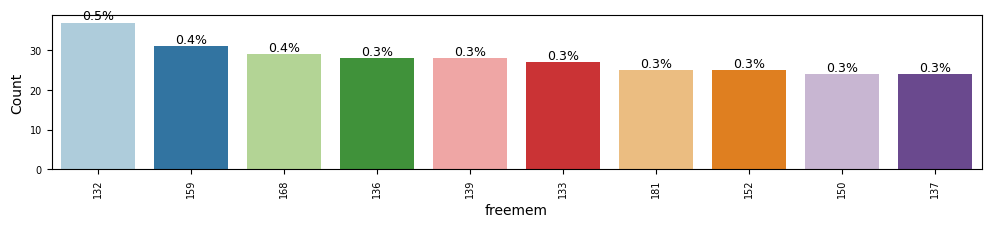

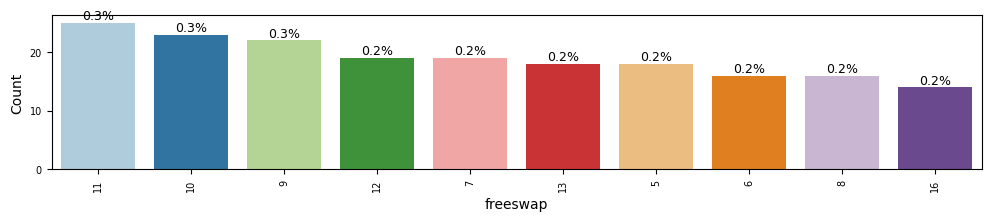

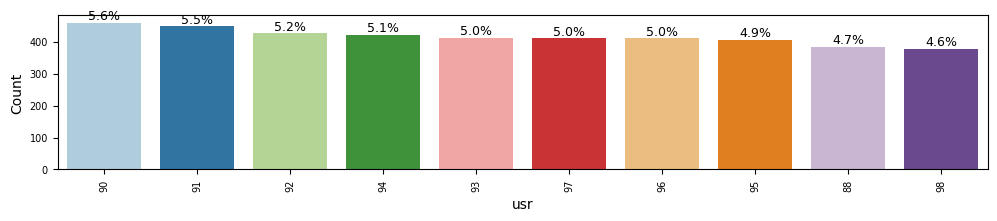

In [32]:
def labeled_barplot(data, feature, perc=False, n=None):   #Barplot with percentage at the top
    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 2))
    else:
        plt.figure(figsize=(n + 2, 2))
    plt.xticks(rotation=90, fontsize=7)
    plt.yticks(fontsize=7)
    ax = sns.countplot(data=data,x=feature,palette="Paired",order=data[feature].value_counts().index[:n],)
    ax.set_ylabel('Count')
    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(100 * p.get_height() / total)  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category
        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot
        ax.annotate(label,(x, y),ha="center",va="center",size=9,xytext=(0, 5),textcoords="offset points",)  # annotate the percentage
    plt.show()

for i in num_var:
    labeled_barplot(df,i,perc=True, n=10)

### <font color='blue'>1 feature has 78%, 4 have more than 50% and 1 has 32% values as zero</font>

### Plot histogram and boxplot to see the spread and outliers of all features

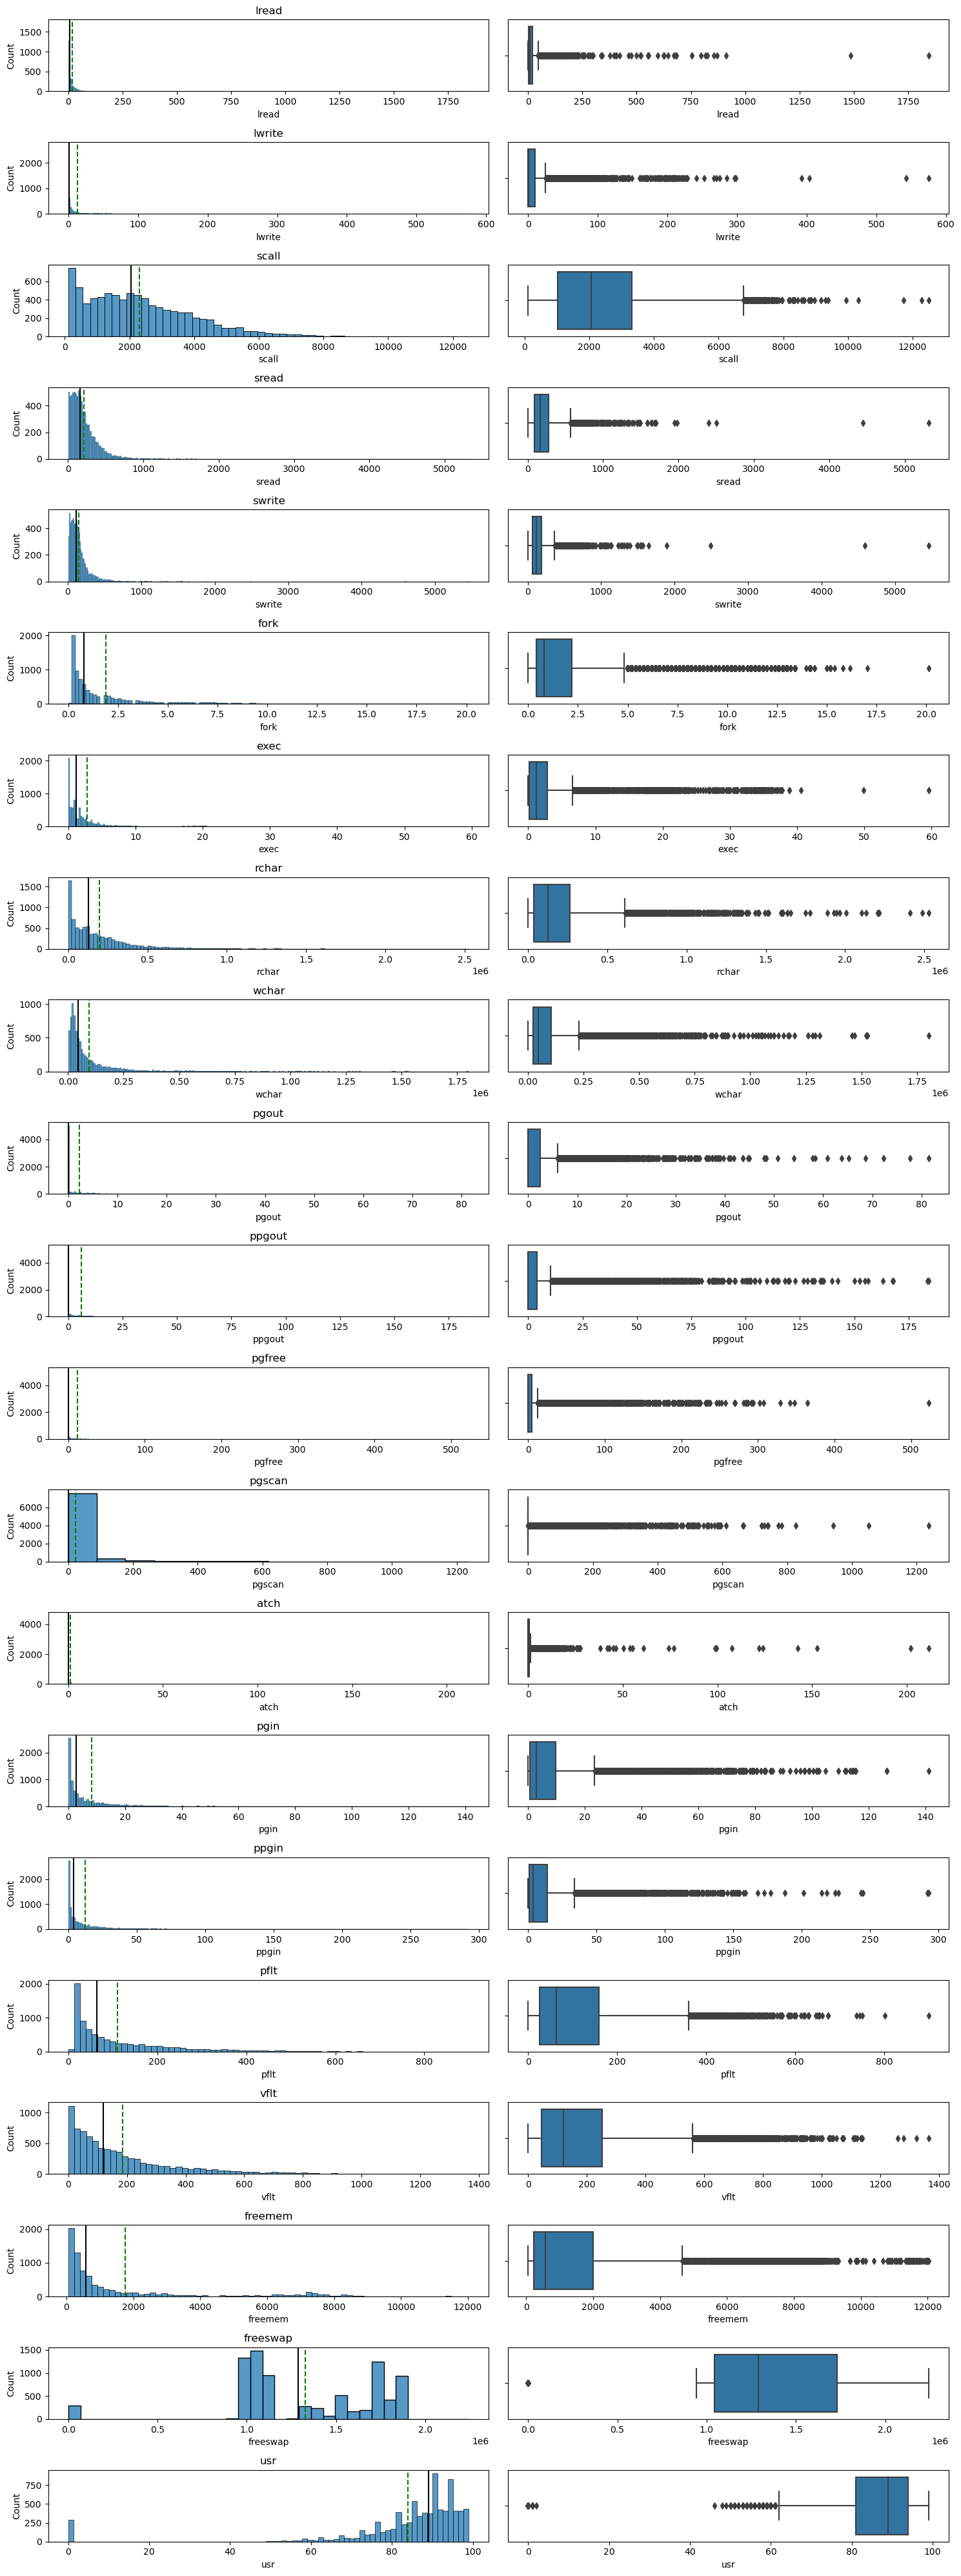

In [33]:
fig, axes = plt.subplots(21, 2, figsize=(15,40))
n=0
for i in num_var:
    sns.histplot(df[i], stat='count', ax=axes[n][0])
    axes[n][0].axvline(df[i].mean(), color="green", linestyle="--")  # Add mean to the histogram
    axes[n][0].axvline(df[i].median(), color="black", linestyle="-")  # Add median to the histogram
    sns.boxplot(df[i], ax=axes[n][1])
    axes[n][0].set_title(i)
    n += 1

plt.tight_layout()
plt.show()

### <font color='blue'>All features except last two have highly right skewed distributions. freeswap and usr are left skewed. All features have many outliers. </font>

### Features with more than 0.6 correlation value

In [34]:
a = df.corr()
b = a.unstack().drop_duplicates()
c = b[(b>0.6) & (b!=1)].sort_values(ascending=False)
c

fork      vflt      0.939348
pflt      vflt      0.935370
fork      pflt      0.931040
pgin      ppgin     0.923621
ppgout    pgfree    0.917790
pgfree    pgscan    0.915217
sread     swrite    0.881069
pgout     ppgout    0.872445
ppgout    pgscan    0.785256
fork      exec      0.763974
pgout     pgfree    0.730381
scall     sread     0.696887
exec      vflt      0.691754
freeswap  usr       0.678526
exec      pflt      0.645239
scall     swrite    0.619984
dtype: float64

### Store features to be plotted on different axis in two lists

In [35]:
col1 = []
col2 = []
for i,j in enumerate(c.index):
    col1.append(j[0])
    col2.append(j[1])

### Scatter plot of highly correlated variables

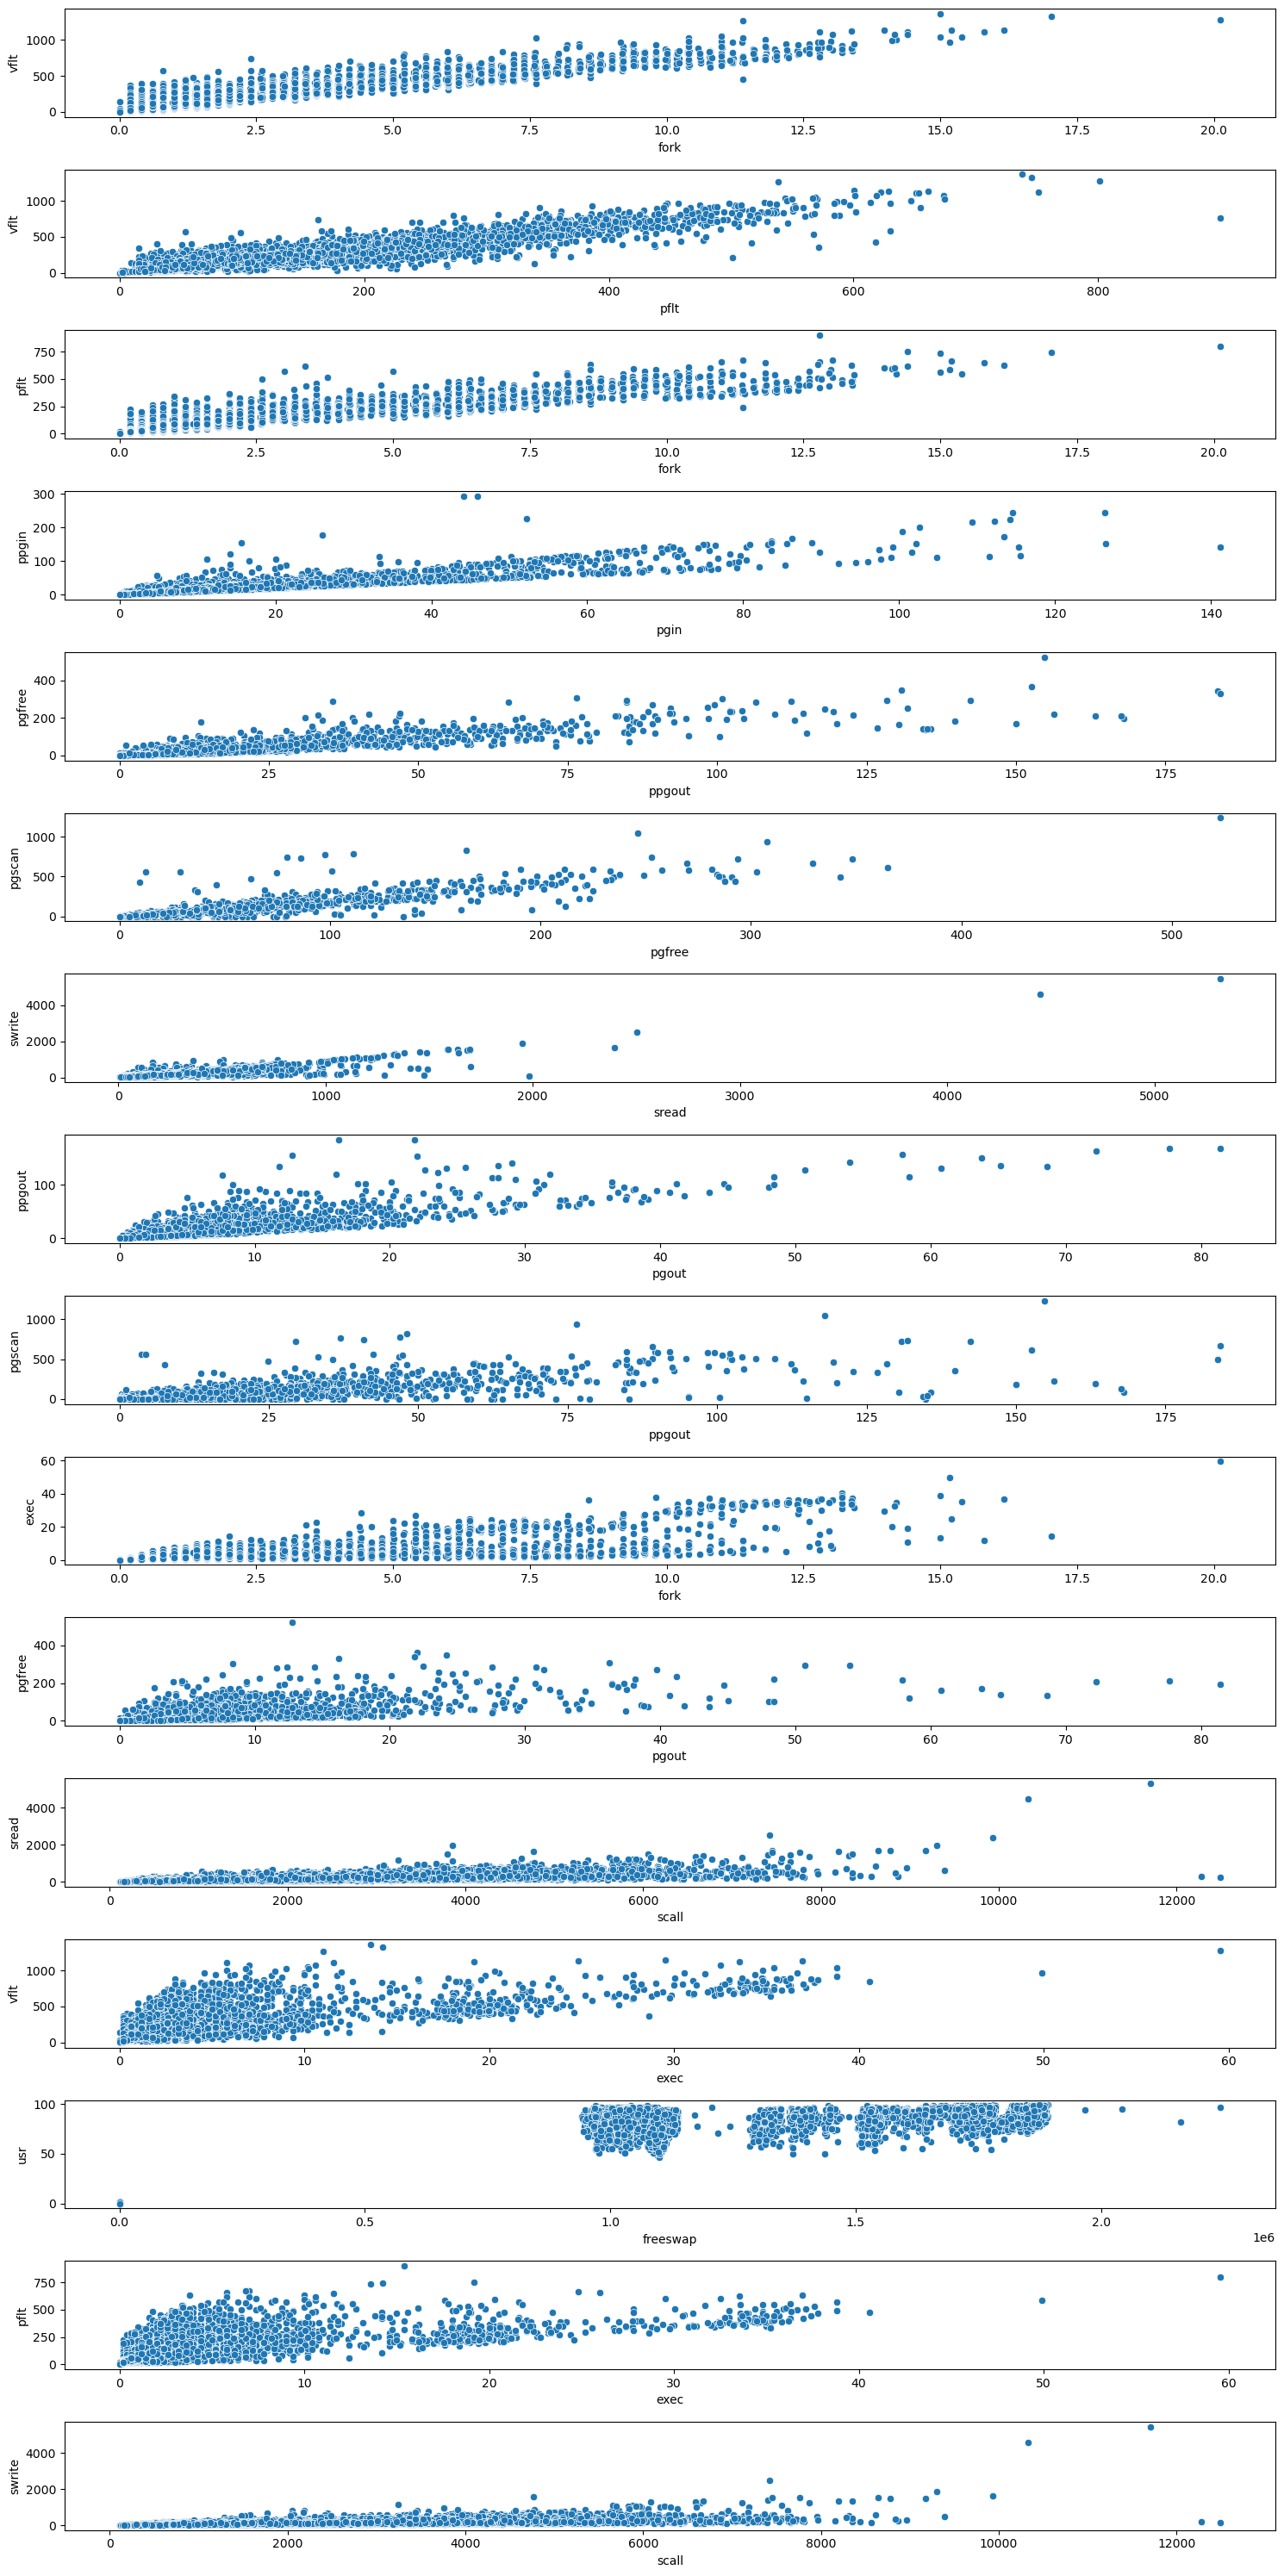

In [18]:
fig, axes = plt.subplots(16, figsize=(15,30))
for i in range(0,16):
    sns.scatterplot(data=df,x=df[col1[i]],y=df[col2[i]], ax=axes[i])

plt.tight_layout()
plt.show()

### Pairplot to check correlation between different features

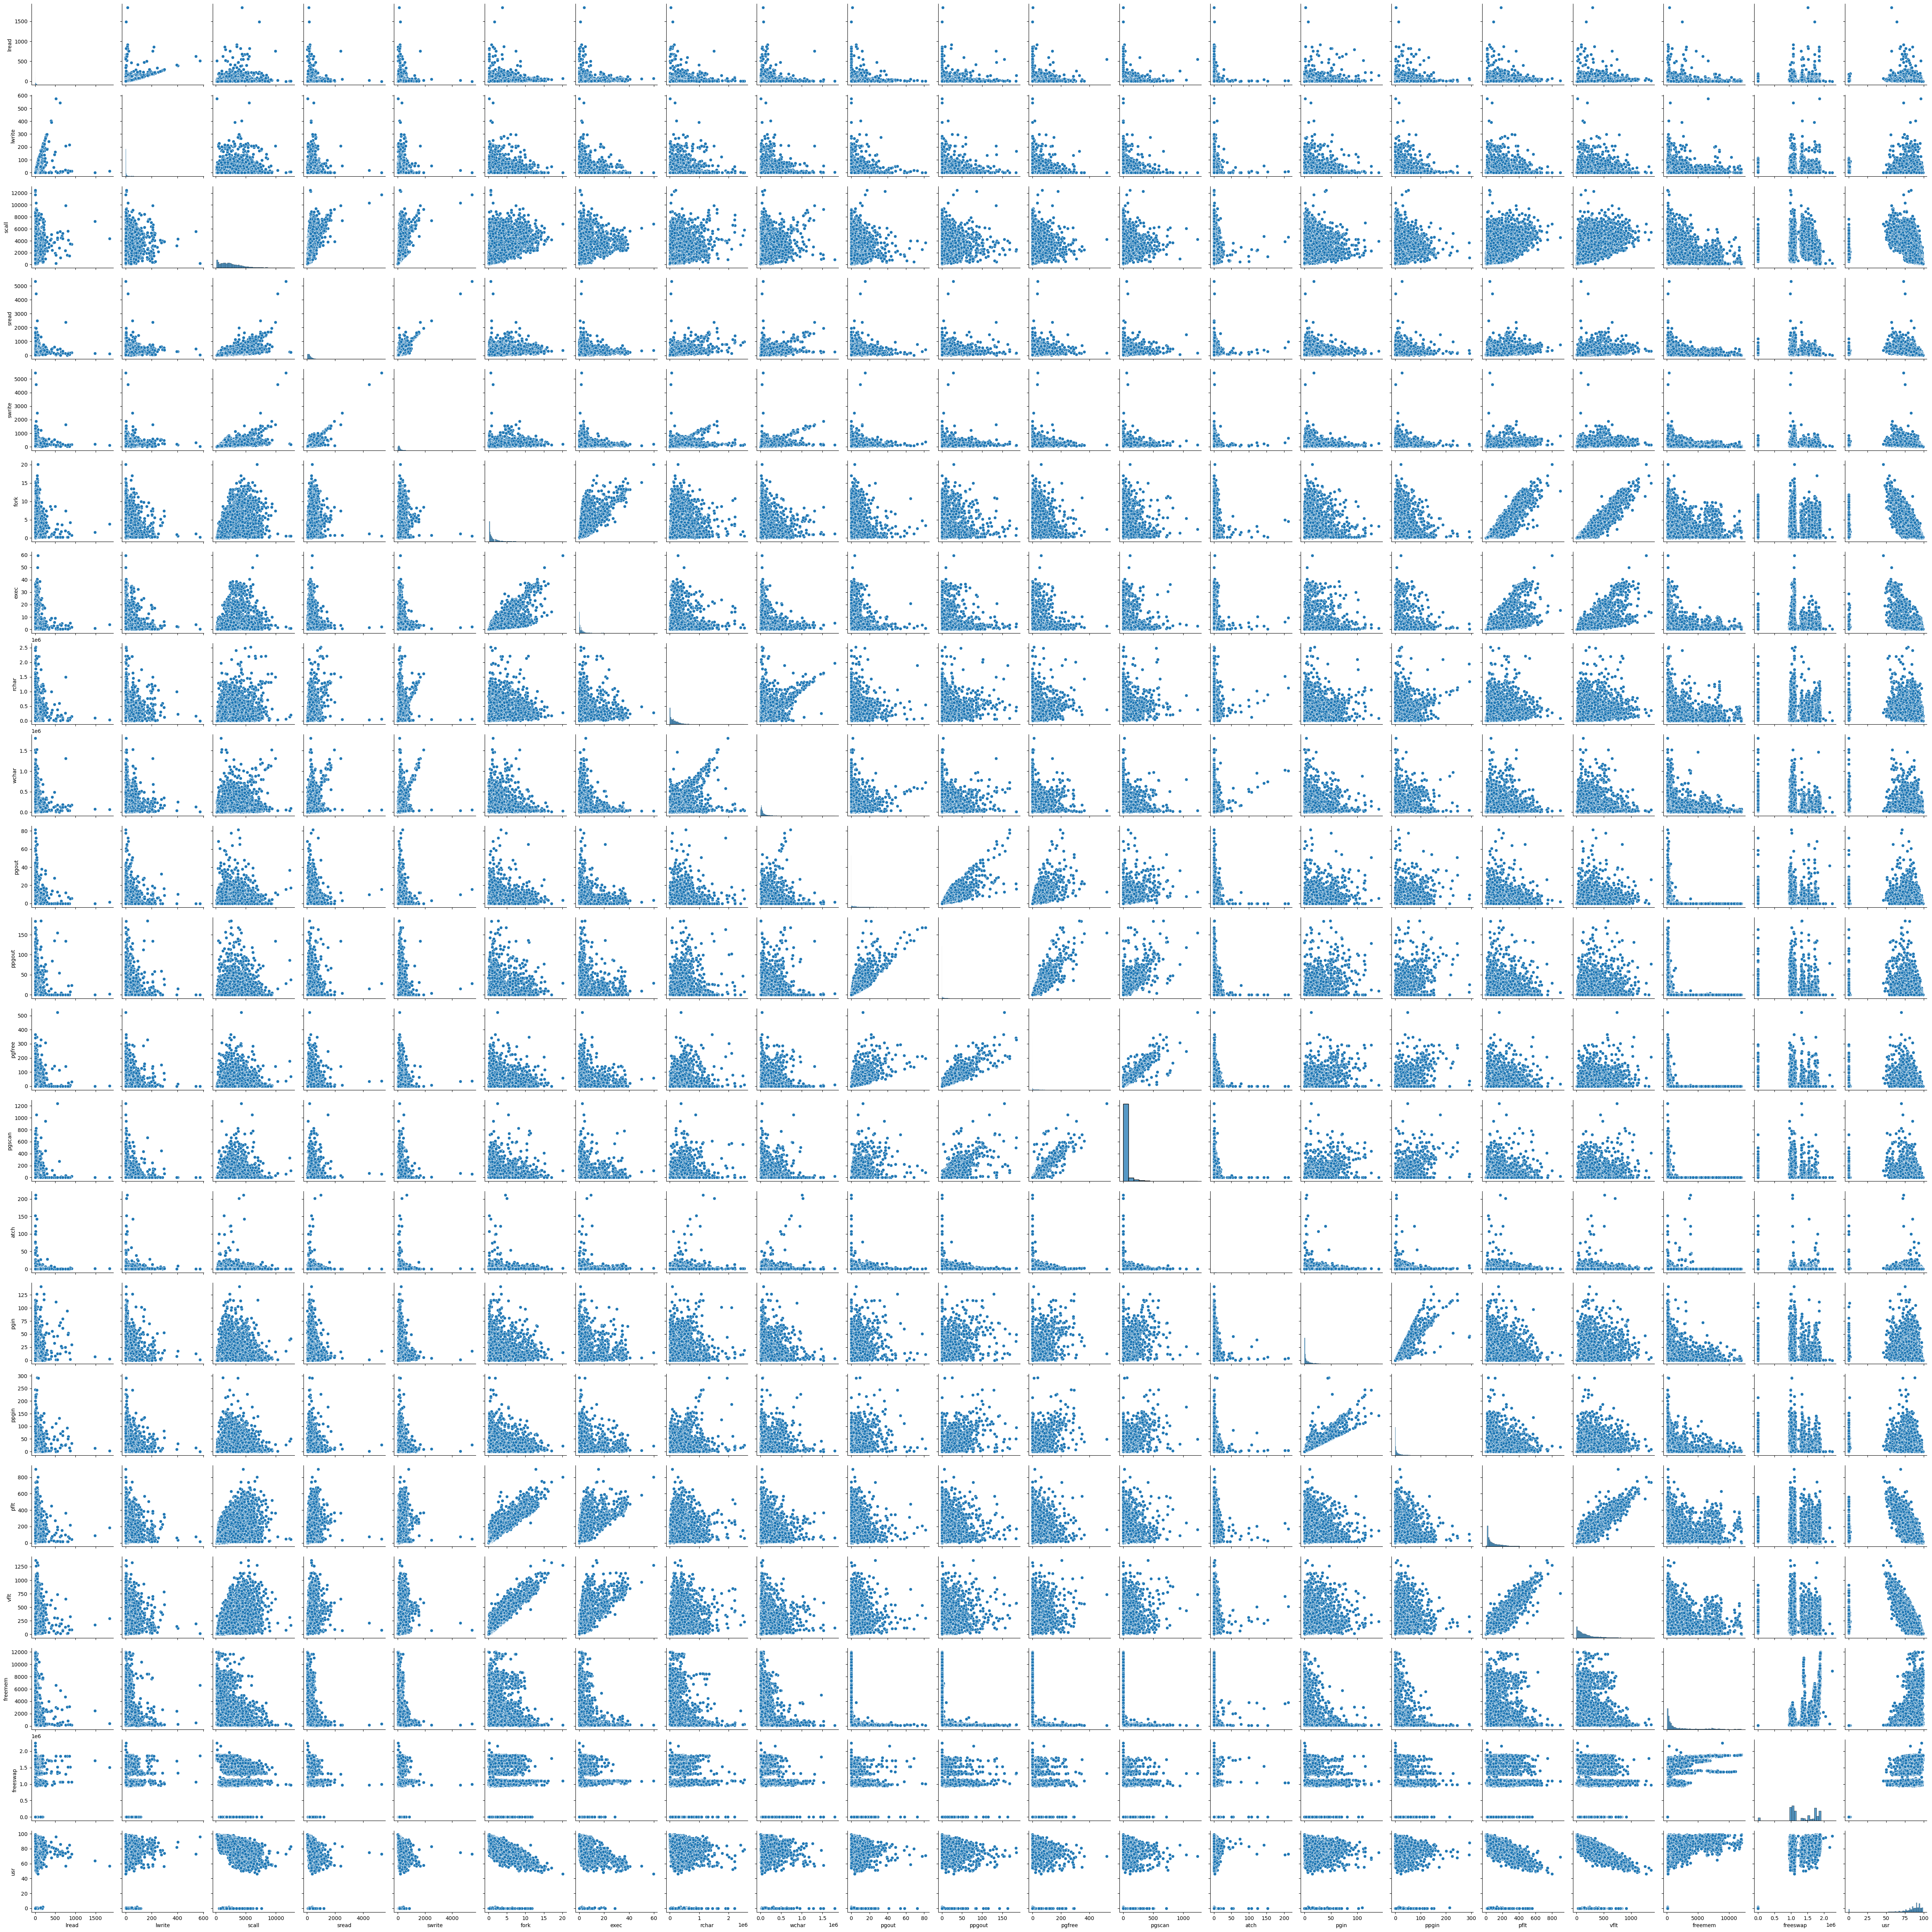

In [19]:
sns.pairplot(df)
plt.show()

### Find number of outliers and %age of outliers in each feature

In [36]:
upper_outliers = []
lower_outliers = []

for i in num_var:
    q1 = np.percentile(df[i],25) # 25th percentile
    q3 = np.percentile(df[i],75) # 75th percentile
    iqr = q3-q1                  # inter quartile range
    upper_limit = q3 + 1.5*iqr
    lower_limit = q1 - 1.5*iqr
    
    lower_outliers.append(df[df[i]<lower_limit].shape[0])
    upper_outliers.append(df[df[i]>upper_limit].shape[0])

outliers = pd.DataFrame(zip(num_var,lower_outliers,upper_outliers), columns=['variables','lower_outliers','upper_outliers'])
outliers['lower_percent'] = round(outliers['lower_outliers']/df.shape[0]*100,1)
outliers['upper_percent'] = round(outliers['upper_outliers']/df.shape[0]*100,1)
outliers.sort_values('upper_outliers', ascending=False)

variables  lower_outliers  upper_outliers  lower_percent  upper_percent
12    pgscan               0            1744            0.0           21.3
11    pgfree               0            1555            0.0           19.0
10    ppgout               0            1315            0.0           16.1
1     lwrite               0            1305            0.0           15.9
13      atch               0            1209            0.0           14.8
18   freemem               0            1185            0.0           14.5
9      pgout               0             988            0.0           12.1
5       fork               0             943            0.0           11.5
15     ppgin               0             821            0.0           10.0
8      wchar               0             817            0.0           10.0
14      pgin               0             789            0.0            9.6
0      lread               0             753            0.0            9.2
6       exec               0             710            0.0            8.7
4     swrite               0             495            0.0            6.0
17      vflt               0             484            0.0            5.9
7      rchar               0             465            0.0            5.7
16      pflt               0             395            0.0            4.8
3      sread               0             340            0.0            4.2
2      scall               0             108            0.0            1.3
19  freeswap             294               0            3.6            0.0
20       usr             430               0            5.2            0.0

### Treat outliers

In [37]:
for i in num_var:
    q1 = np.percentile(df[i],25)
    q3 = np.percentile(df[i],75)
    iqr = q3-q1
    upper_limit = q3 + 1.5*iqr
    lower_limit = q1 - 1.5*iqr
    
    df[i]=df[i].apply(lambda x: upper_limit if x> upper_limit else x)
    df[i]=df[i].apply(lambda x: lower_limit if x< lower_limit else x)

### Check boxplot to see if all outliers have been treated 

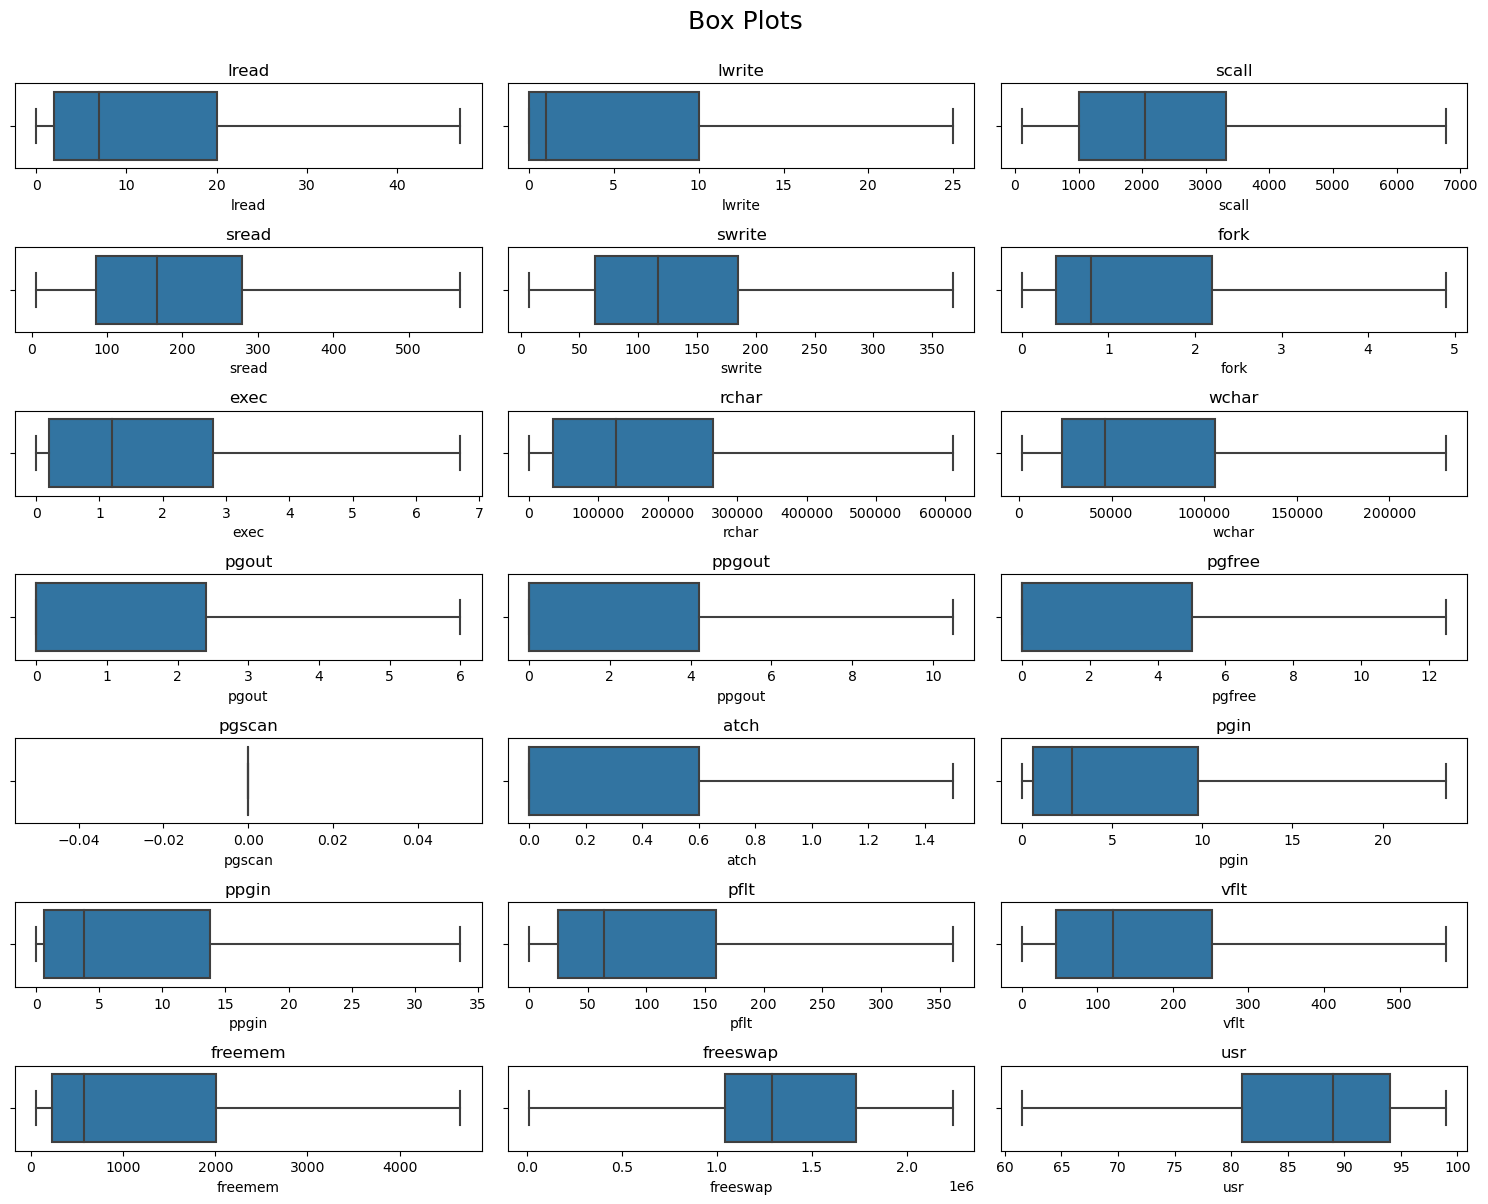

In [38]:
plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=1)
plt.suptitle("Box Plots", fontsize=18, y=1)
n=0
for i in num_var:
    ax = plt.subplot(7, 3, n + 1)
    sns.boxplot(df[i],ax=ax)
    ax.set_title(i)
    n += 1
    
plt.tight_layout()


### One hot encoding of categorical feature

In [39]:
df = pd.get_dummies(df,'runqsz',drop_first=True)

### View top5 rows to check the encoding

In [40]:
df.head()

lread  lwrite   scall  sread  swrite  fork  exec     rchar    wchar  pgout  \
0    1.0     0.0  2147.0   79.0    68.0   0.2   0.2   40671.0  53995.0    0.0   
1    0.0     0.0   170.0   18.0    21.0   0.2   0.2     448.0   8385.0    0.0   
2   15.0     3.0  2162.0  159.0   119.0   2.0   2.4  125473.5  31950.0    0.0   
3    0.0     0.0   160.0   12.0    16.0   0.2   0.2  125473.5   8670.0    0.0   
4    5.0     1.0   330.0   39.0    38.0   0.4   0.4  125473.5  12185.0    0.0   

   ppgout  pgfree  pgscan  atch  pgin  ppgin    pflt    vflt   freemem  \
0     0.0     0.0     0.0   0.0   1.6    2.6   16.00   26.40  4659.125   
1     0.0     0.0     0.0   0.0   0.0    0.0   15.63   16.83  4659.125   
2     0.0     0.0     0.0   1.2   6.0    9.4  150.20  220.20   702.000   
3     0.0     0.0     0.0   0.0   0.2    0.2   15.60   16.80  4659.125   
4     0.0     0.0     0.0   0.0   1.0    1.2   37.80   47.60   633.000   

    freeswap   usr  runqsz_Not_CPU_Bound  
0  1730946.0  95.0                     0  
1  1869002.0  97.0                     1  
2  1021237.0  87.0                     1  
3  1863704.0  98.0                     1  
4  1760253.0  90.0                     1

### Check correlation of usr and pgscan

In [41]:
np.corrcoef(dataset['usr'],dataset['pgscan'])

array([[ 1.        , -0.18148801],
       [-0.18148801,  1.        ]])

### pgscan is weakly correlated to usr  and 78% of values in pgscan are zero so we can drop it

In [42]:
df=df.drop('pgscan', axis=1)

### import stats library from scipy and scale the dataset using zscore

In [43]:
import scipy.stats as stats

In [83]:
scaled_df = df.apply(stats.zscore)
scaled_df.head()

lread    lwrite     scall     sread    swrite      fork      exec  \
0 -0.819513 -0.716521 -0.092583 -0.823008 -0.720331 -0.853341 -0.853740   
1 -0.885482 -0.716521 -1.333640 -1.238681 -1.204189 -0.853341 -0.853740   
2  0.104042 -0.393641 -0.083166 -0.277863 -0.195293  0.277935  0.231003   
3 -0.885482 -0.716521 -1.339918 -1.279567 -1.255663 -0.853341 -0.853740   
4 -0.555640 -0.608895 -1.233200 -1.095580 -1.029176 -0.727644 -0.755127   

      rchar     wchar    pgout    ppgout    pgfree      atch      pgin  \
0 -0.791696 -0.303831 -0.64583 -0.634297 -0.635071 -0.689780 -0.622761   
1 -1.022096 -0.943894 -0.64583 -0.634297 -0.635071 -0.689780 -0.830987   
2 -0.305940 -0.613197 -0.64583 -0.634297 -0.635071  1.442029 -0.050138   
3 -0.305940 -0.939894 -0.64583 -0.634297 -0.635071 -0.689780 -0.804959   
4 -0.305940 -0.890567 -0.64583 -0.634297 -0.635071 -0.689780 -0.700845   

      ppgin      pflt      vflt   freemem  freeswap       usr  \
0 -0.586048 -0.882744 -0.918365  2.037473  0.956433  0.898009   
1 -0.819018 -0.886387 -0.977262  2.037473  1.284547  1.103180   
2  0.023258  0.438869  0.274345 -0.427003 -0.730310  0.077327   
3 -0.801097 -0.886683 -0.977446  2.037473  1.271955  1.205765   
4 -0.711493 -0.668055 -0.787893 -0.469976  1.026087  0.385083   

   runqsz_Not_CPU_Bound  
0             -1.059118  
1              0.944182  
2              0.944182  
3              0.944182  
4              0.944182

### import required libraries for LinearRegression, splitting the dataset in train and test subsets and MSE

In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor

### Divide dataset in x and y where x has only independent variables and y has only 1 dependent variable 

In [85]:
# independent variables
x = scaled_df.drop(["usr"], axis=1)
# dependent variable
y = scaled_df[["usr"]]

In [86]:
x.head()

lread    lwrite     scall     sread    swrite      fork      exec  \
0 -0.819513 -0.716521 -0.092583 -0.823008 -0.720331 -0.853341 -0.853740   
1 -0.885482 -0.716521 -1.333640 -1.238681 -1.204189 -0.853341 -0.853740   
2  0.104042 -0.393641 -0.083166 -0.277863 -0.195293  0.277935  0.231003   
3 -0.885482 -0.716521 -1.339918 -1.279567 -1.255663 -0.853341 -0.853740   
4 -0.555640 -0.608895 -1.233200 -1.095580 -1.029176 -0.727644 -0.755127   

      rchar     wchar    pgout    ppgout    pgfree      atch      pgin  \
0 -0.791696 -0.303831 -0.64583 -0.634297 -0.635071 -0.689780 -0.622761   
1 -1.022096 -0.943894 -0.64583 -0.634297 -0.635071 -0.689780 -0.830987   
2 -0.305940 -0.613197 -0.64583 -0.634297 -0.635071  1.442029 -0.050138   
3 -0.305940 -0.939894 -0.64583 -0.634297 -0.635071 -0.689780 -0.804959   
4 -0.305940 -0.890567 -0.64583 -0.634297 -0.635071 -0.689780 -0.700845   

      ppgin      pflt      vflt   freemem  freeswap  runqsz_Not_CPU_Bound  
0 -0.586048 -0.882744 -0.918365  2.037473  0.956433             -1.059118  
1 -0.819018 -0.886387 -0.977262  2.037473  1.284547              0.944182  
2  0.023258  0.438869  0.274345 -0.427003 -0.730310              0.944182  
3 -0.801097 -0.886683 -0.977446  2.037473  1.271955              0.944182  
4 -0.711493 -0.668055 -0.787893 -0.469976  1.026087              0.944182

In [87]:
y.head()

usr
0  0.898009
1  1.103180
2  0.077327
3  1.205765
4  0.385083

### Add constant to independent variables

In [88]:
x = sm.add_constant(x)

### Create an object of LinearRegression and fit the model. Calculate MSE, RMSE, VIF, R-sqaured and Adj R-squared

In [89]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, stratify = y) 

lr = LinearRegression()         # creating an object of linear regression
lr.fit(x_train, y_train)        # fitting the model on train dataset
y_pred = lr.predict(x_test)     # predicting the values from test dataset

mse = round(mean_squared_error(y_pred, y_test),4)   # rounding and storing MSE
rmse = round(np.sqrt(mse),4)               # root mean squared error

olsmod = sm.OLS(y_train, x_train)  # ordinary least squares
olsres = olsmod.fit()              # fit OLS

#variance inflation factor
vif = pd.Series([variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])], index = x_train.columns).sort_values(ascending=False)

print(f"\nMSE: {mse}, RMSE: {rmse}, R-squared: {round(olsres.rsquared,3)}, Adj R-sqaured: {round(olsres.rsquared_adj,3)} \n")

print("VIF Values: \n", vif[:10],'\n', sep="")

print('         R-squared    Adj R-sqaured')
for i in vif.index:
    x_train2=x_train.drop([i],axis=1)
    olsmod1 = sm.OLS(y_train, x_train2)
    olsres1=olsmod1.fit()
    
    print(i, ' '*(10-len(i)),round(olsres1.rsquared,3),'       ', round(olsres1.rsquared_adj,3))


MSE: 0.2072, RMSE: 0.4552, R-squared: 0.786, Adj R-sqaured: 0.785 

VIF Values: 
ppgout    30.949718
pgfree    17.541844
vflt      15.572687
ppgin     13.944049
pgin      13.817357
fork      13.040382
pgout     11.620181
pflt      11.365556
sread      6.365122
swrite     5.597886
dtype: float64

         R-squared    Adj R-sqaured
ppgout      0.786         0.785
pgfree      0.786         0.785
vflt        0.785         0.784
ppgin       0.785         0.785
pgin        0.786         0.785
fork        0.786         0.785
pgout       0.785         0.784
pflt        0.776         0.775
sread       0.786         0.785
swrite      0.785         0.785
lread       0.784         0.783
lwrite      0.785         0.785
exec        0.785         0.784
scall       0.781         0.78
rchar       0.782         0.782
freemem     0.783         0.782
atch        0.785         0.785
freeswap    0.699         0.698
wchar       0.785         0.784
runqsz_Not_CPU_Bound  0.779         0.778
const       0.786

In [90]:
def reg(x):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, stratify = y) 

    lr = LinearRegression()         # creating an object of linear regression
    lr.fit(x_train, y_train)        # fitting the model on train dataset
    y_pred = lr.predict(x_test)     # predicting the values from test dataset

    mse = round(mean_squared_error(y_pred, y_test),4)   # rounding and storing MSE
    rmse = round(np.sqrt(mse),4)               # root mean squared error

    olsmod = sm.OLS(y_train, x_train)  # ordinary least squares
    olsres = olsmod.fit()              # fit OLS

    #variance inflation factor
    vif = pd.Series([variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])], index = x_train.columns).sort_values(ascending=False)

    print(f"\nMSE: {mse}, RMSE: {rmse}, R-squared: {round(olsres.rsquared,3)}, Adj R-sqaured: {round(olsres.rsquared_adj,3)} \n")

    print("VIF Values: \n", vif[:10],'\n', sep="")

    print('         R-squared    Adj R-sqaured')
    for i in vif.index:
        x_train2=x_train.drop([i],axis=1)
        olsmod1 = sm.OLS(y_train, x_train2)
        olsres1=olsmod1.fit()

        print(i, ' '*(10-len(i)),round(olsres1.rsquared,3),'       ', round(olsres1.rsquared_adj,3))


x=x.drop(['ppgout'],axis=1)
reg(x)


MSE: 0.2133, RMSE: 0.4618, R-squared: 0.788, Adj R-sqaured: 0.788 

VIF Values: 
vflt      14.768859
ppgin     13.870256
pgin      13.722609
fork      13.038144
pflt      11.558250
sread      6.508995
pgout      6.179078
pgfree     5.899838
swrite     5.559277
lread      5.167879
dtype: float64

         R-squared    Adj R-sqaured
vflt        0.788         0.787
ppgin       0.788         0.787
pgin        0.788         0.788
fork        0.788         0.788
pflt        0.778         0.777
sread       0.788         0.788
pgout       0.786         0.786
pgfree      0.788         0.787
swrite      0.788         0.787
lread       0.787         0.787
lwrite      0.788         0.787
exec        0.787         0.786
scall       0.785         0.784
rchar       0.784         0.783
freemem     0.785         0.784
atch        0.788         0.787
freeswap    0.693         0.692
wchar       0.787         0.786
runqsz_Not_CPU_Bound  0.781         0.781
const       0.788         0.788


In [91]:
x=x.drop(['ppgin'],axis=1)
reg(x)


MSE: 0.2191, RMSE: 0.4681, R-squared: 0.791, Adj R-sqaured: 0.79 

VIF Values: 
vflt      15.472818
fork      13.066100
pflt      11.821049
sread      6.353777
pgout      6.337784
pgfree     6.060311
swrite     5.565712
lread      5.168468
lwrite     4.196587
exec       3.221851
dtype: float64

         R-squared    Adj R-sqaured
vflt        0.79         0.789
fork        0.791         0.79
pflt        0.78         0.779
sread       0.791         0.79
pgout       0.789         0.788
pgfree      0.79         0.79
swrite      0.79         0.789
lread       0.789         0.788
lwrite      0.79         0.789
exec        0.789         0.789
scall       0.786         0.785
rchar       0.786         0.785
freemem     0.788         0.787
atch        0.79         0.789
freeswap    0.706         0.706
pgin        0.79         0.789
wchar       0.79         0.789
runqsz_Not_CPU_Bound  0.784         0.783
const       0.791         0.79


In [92]:
x=x.drop(['vflt'],axis=1)
reg(x)


MSE: 0.2145, RMSE: 0.4631, R-squared: 0.788, Adj R-sqaured: 0.787 

VIF Values: 
fork      10.380219
pflt       9.243914
sread      6.629594
pgout      6.319172
pgfree     5.913594
swrite     5.810469
lread      5.348139
lwrite     4.363554
exec       3.186107
scall      3.012331
dtype: float64

         R-squared    Adj R-sqaured
fork        0.787         0.787
pflt        0.771         0.77
sread       0.788         0.787
pgout       0.786         0.785
pgfree      0.787         0.787
swrite      0.787         0.786
lread       0.786         0.786
lwrite      0.787         0.787
exec        0.786         0.786
scall       0.783         0.783
rchar       0.784         0.783
freemem     0.784         0.784
atch        0.787         0.787
freeswap    0.698         0.697
wchar       0.787         0.786
pgin        0.784         0.784
runqsz_Not_CPU_Bound  0.781         0.78
const       0.788         0.787


In [93]:
x=x.drop(['fork'],axis=1)
reg(x)


MSE: 0.2177, RMSE: 0.4666, R-squared: 0.789, Adj R-sqaured: 0.788 

VIF Values: 
sread     6.523206
pgout     6.334587
pgfree    5.921379
swrite    5.401458
lread     5.315731
lwrite    4.416757
pflt      3.349644
scall     2.954400
exec      2.740843
rchar     2.077545
dtype: float64

         R-squared    Adj R-sqaured
sread       0.789         0.788
pgout       0.787         0.787
pgfree      0.789         0.788
swrite      0.788         0.788
lread       0.787         0.786
lwrite      0.788         0.787
pflt        0.736         0.735
scall       0.784         0.784
exec        0.787         0.786
rchar       0.785         0.784
freemem     0.785         0.784
atch        0.788         0.788
freeswap    0.69         0.689
wchar       0.788         0.787
pgin        0.786         0.786
runqsz_Not_CPU_Bound  0.781         0.781
const       0.789         0.788


In [55]:
x=x.drop(['sread'],axis=1)
reg(x)


MSE: 0.2062, RMSE: 0.4541, R-squared: 0.784, Adj R-sqaured: 0.783 

VIF Values: 
pgout      6.295122
pgfree     5.930038
lread      5.104822
lwrite     4.178385
pflt       3.316049
swrite     3.051623
exec       2.716388
scall      2.671807
freemem    1.969017
atch       1.820171
dtype: float64

         R-squared    Adj R-sqaured
pgout       0.782         0.782
pgfree      0.783         0.783
lread       0.781         0.781
lwrite      0.783         0.782
pflt        0.733         0.733
swrite      0.783         0.782
exec        0.782         0.781
scall       0.779         0.778
freemem     0.78         0.779
atch        0.783         0.783


In [56]:
x=x.drop(['pgfree'],axis=1)
reg(x)


MSE: 0.2152, RMSE: 0.4639, R-squared: 0.787, Adj R-sqaured: 0.787 

VIF Values: 
lread       5.030096
lwrite      4.104410
pflt        3.329433
swrite      2.969244
exec        2.773249
scall       2.668588
pgout       1.987559
freemem     1.954039
atch        1.814414
freeswap    1.747702
dtype: float64

         R-squared    Adj R-sqaured
lread       0.786         0.785
lwrite      0.787         0.786
pflt        0.734         0.733
swrite      0.786         0.786
exec        0.786         0.785
scall       0.783         0.783
pgout       0.785         0.784
freemem     0.784         0.783
atch        0.787         0.786
freeswap    0.696         0.695


In [57]:
x=x.drop(['lwrite'],axis=1)
reg(x)


MSE: 0.2196, RMSE: 0.4686, R-squared: 0.788, Adj R-sqaured: 0.788 

VIF Values: 
pflt        3.269818
swrite      3.003981
exec        2.804945
scall       2.670916
pgout       2.027843
freemem     1.953260
atch        1.855991
freeswap    1.733106
rchar       1.658769
wchar       1.576989
dtype: float64

         R-squared    Adj R-sqaured
pflt        0.733         0.733
swrite      0.787         0.787
exec        0.787         0.786
scall       0.784         0.784
pgout       0.785         0.785
freemem     0.785         0.785
atch        0.788         0.787
freeswap    0.697         0.697
rchar       0.784         0.783
wchar       0.788         0.787


In [58]:
x=x.drop(['swrite'],axis=1)
reg(x)


MSE: 0.2152, RMSE: 0.4639, R-squared: 0.785, Adj R-sqaured: 0.785 

VIF Values: 
pflt        2.712915
exec        2.498454
pgout       2.010524
freemem     1.925785
atch        1.833434
scall       1.751873
freeswap    1.736646
rchar       1.650043
pgin        1.485007
wchar       1.446790
dtype: float64

         R-squared    Adj R-sqaured
pflt        0.707         0.707
exec        0.784         0.784
pgout       0.783         0.782
freemem     0.782         0.782
atch        0.785         0.784
scall       0.774         0.774
freeswap    0.691         0.691
rchar       0.781         0.78
pgin        0.781         0.78
wchar       0.783         0.783


In [59]:
x=x.drop(['exec'],axis=1)
reg(x)


MSE: 0.2202, RMSE: 0.4693, R-squared: 0.786, Adj R-sqaured: 0.785 

VIF Values: 
pgout       2.049130
freemem     1.933146
atch        1.853803
scall       1.762684
freeswap    1.752951
rchar       1.642046
pflt        1.547966
pgin        1.469117
wchar       1.434979
lread       1.276291
dtype: float64

         R-squared    Adj R-sqaured
pgout       0.783         0.783
freemem     0.783         0.782
atch        0.785         0.785
scall       0.776         0.775
freeswap    0.69         0.689
rchar       0.781         0.78
pflt        0.628         0.628
pgin        0.783         0.782
wchar       0.784         0.784
lread       0.784         0.783


In [60]:
x=x.drop(['pgout'],axis=1)
reg(x)


MSE: 0.2263, RMSE: 0.4757, R-squared: 0.784, Adj R-sqaured: 0.783 

VIF Values: 
freemem                 1.821997
scall                   1.739547
freeswap                1.714131
rchar                   1.632809
pflt                    1.550801
wchar                   1.405982
pgin                    1.359078
atch                    1.355354
lread                   1.279841
runqsz_Not_CPU_Bound    1.132420
dtype: float64

         R-squared    Adj R-sqaured
freemem     0.782         0.782
scall       0.771         0.771
freeswap    0.689         0.689
rchar       0.779         0.778
pflt        0.628         0.627
wchar       0.782         0.782
pgin        0.779         0.778
atch        0.784         0.783
lread       0.782         0.782
runqsz_Not_CPU_Bound  0.776         0.776


In [61]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, stratify = y) 

lr = LinearRegression()         # creating an object of linear regression
lr.fit(x_train, y_train)        # fitting the model on train dataset
y_pred = lr.predict(x_test)     # predicting the values from test dataset

olsmod = sm.OLS(y_train, x_train)  # ordinary least squares
olsres = olsmod.fit()              # fit OLS

print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     2032.
Date:                Sat, 05 Nov 2022   Prob (F-statistic):               0.00
Time:                        21:28:27   Log-Likelihood:                -3790.8
No. Observations:                5734   AIC:                             7604.
Df Residuals:                    5723   BIC:                             7677.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0032 

In [62]:
x=x.drop(['atch'],axis=1)
reg(x)


MSE: 0.21, RMSE: 0.4583, R-squared: 0.777, Adj R-sqaured: 0.776 

VIF Values: 
scall                   1.742809
freeswap                1.716232
freemem                 1.706917
rchar                   1.617122
pflt                    1.516315
wchar                   1.407024
pgin                    1.350963
lread                   1.267251
runqsz_Not_CPU_Bound    1.125701
const                   1.000231
dtype: float64

         R-squared    Adj R-sqaured
scall       0.767         0.767
freeswap    0.672         0.671
freemem     0.774         0.774
rchar       0.772         0.772
pflt        0.621         0.62
wchar       0.775         0.774
pgin        0.771         0.77
lread       0.775         0.774
runqsz_Not_CPU_Bound  0.769         0.769
const       0.777         0.776


In [63]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, stratify = y) 

lr = LinearRegression()         # creating an object of linear regression
lr.fit(x_train, y_train)        # fitting the model on train dataset
y_pred = lr.predict(x_test)     # predicting the values from test dataset

olsmod = sm.OLS(y_train, x_train)  # ordinary least squares
olsres = olsmod.fit()              # fit OLS

print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     2260.
Date:                Sat, 05 Nov 2022   Prob (F-statistic):               0.00
Time:                        21:28:27   Log-Likelihood:                -3789.3
No. Observations:                5734   AIC:                             7599.
Df Residuals:                    5724   BIC:                             7665.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0032 

In [64]:
selected_df= df[['lread','scall','exec','rchar','wchar','pgout','atch','pgin','pflt','freemem','freeswap','runqsz_Not_CPU_Bound']]
x = selected_df

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, stratify = y)
                 
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

mse = round(mean_squared_error(y_pred, y_test),4)   # rounding and storing MSE
rmse = round(np.sqrt(mse),4)               # root mean squared error

print(f"\nMSE: {mse}, RMSE: {rmse}, R-squared: {round(olsres.rsquared,3)}, Adj R-sqaured: {round(olsres.rsquared_adj,3)} \n")



MSE: 0.2133, RMSE: 0.4618, R-squared: 0.78, Adj R-sqaured: 0.78 



In [65]:
lr.intercept_[0]

-0.33327956470002107

In [66]:
lr.coef_

array([[-3.15191367e-03, -8.21742963e-05, -2.46565230e-02,
        -5.48101990e-07, -5.65059829e-07, -3.82467034e-02,
         7.32065990e-02, -9.50136514e-03, -4.40959499e-03,
        -4.36725281e-05,  9.52344972e-07,  1.90848751e-01]])

In [67]:
for idx, col_name in enumerate(x_train.columns):
    print(f"The coefficient for {col_name} is {lr.coef_[0][idx]}")

The coefficient for lread is -0.0031519136681777433
The coefficient for scall is -8.217429632941087e-05
The coefficient for exec is -0.02465652301342119
The coefficient for rchar is -5.481019901380668e-07
The coefficient for wchar is -5.650598292028234e-07
The coefficient for pgout is -0.038246703402753164
The coefficient for atch is 0.07320659900959268
The coefficient for pgin is -0.009501365136070146
The coefficient for pflt is -0.004409594993050042
The coefficient for freemem is -4.3672528090496847e-05
The coefficient for freeswap is 9.52344972374011e-07
The coefficient for runqsz_Not_CPU_Bound is 0.1908487505211751


In [68]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

In [69]:
ridge = Ridge(alpha=.3)
ridge.fit(x_train,y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [[-3.15197162e-03 -8.21765934e-05 -2.46557104e-02 -5.48112103e-07
  -5.65115649e-07 -3.82416612e-02  7.31830917e-02 -9.50136519e-03
  -4.40959923e-03 -4.36716744e-05  9.52339306e-07  1.90803214e-01]]


In [70]:
lasso = Lasso(alpha=0.1)
lasso.fit(x_train,y_train)
print ("Lasso model:", (lasso.coef_))

# Observe, many of the coefficients have become 0 indicating drop of those dimensions from the model

Lasso model: [-3.25374143e-03 -9.51568607e-05 -0.00000000e+00 -6.25417487e-07
 -8.25267373e-07 -0.00000000e+00  0.00000000e+00 -9.49531369e-03
 -4.76445239e-03 -2.67087190e-05  9.40577532e-07  0.00000000e+00]


In [71]:
print(lr.score(x_train, y_train))
print(lr.score(x_test, y_test))

0.784475590834656
0.7868202904598856


In [72]:
print(ridge.score(x_train, y_train))
print(ridge.score(x_test, y_test))

0.7844755902787652
0.7868210785204903


In [73]:
print(lasso.score(x_train, y_train))
print(lasso.score(x_test, y_test))

0.7724764554095687
0.7770484816607612


In [74]:
from sklearn.preprocessing import PolynomialFeatures

In [75]:
poly = PolynomialFeatures(degree = 2, interaction_only=True)
x_poly = poly.fit_transform(scaled_df)
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.30, random_state=1)
x_train.shape

(5734, 232)

In [76]:
lr.fit(x_train, y_train)
print(lr.coef_[0])

[-4.29510286e-18 -9.50628465e-16  6.45317133e-16 -4.99600361e-16
  5.27355937e-16 -9.57567359e-16  2.39391840e-16  1.45716772e-16
  7.97972799e-17  2.68882139e-16  6.83481050e-16 -1.24553146e-15
 -1.07552856e-16  3.46944695e-18 -5.41233725e-16  3.60822483e-16
 -7.42461648e-16  1.28369537e-16 -7.91033905e-16  6.86950496e-16
  1.00000000e+00  4.77048956e-18  5.37764278e-17 -1.43982049e-16
  3.66026653e-16 -4.90926744e-16  5.16947596e-16 -2.58473798e-16
 -3.33934269e-16  5.62917768e-16 -2.66280054e-16  1.71303943e-15
 -1.03042574e-15 -7.26415456e-17  7.00828284e-16 -6.24500451e-16
 -9.36750677e-17  1.67400815e-16 -1.44849410e-16  5.27355937e-16
 -3.56485674e-16  7.28583860e-17  1.70870262e-16  3.94649591e-16
  2.76688394e-16 -4.37150316e-16  8.50014503e-17 -1.91686944e-16
 -7.36390116e-16  4.18935719e-16 -2.04263689e-15  1.71130471e-15
 -5.04154010e-16 -4.13731549e-16  8.52616588e-16 -5.94576471e-16
  7.49400542e-16  2.18575158e-16  1.96891115e-16  1.61329283e-16
  3.17454396e-16 -6.93889

In [77]:
print(lr.score(x_train, y_train))
print(lr.score(x_test, y_test))

1.0
1.0


In [78]:
ridge = Ridge(alpha=.3)
ridge.fit(x_train,y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [[ 0.00000000e+00 -3.22571712e-05  3.09243966e-06 -1.51109877e-04
  -2.48238424e-05 -7.56503353e-05 -9.30212303e-06 -2.82645171e-05
  -4.70505549e-05 -3.38483814e-05 -5.28199802e-05  4.96154872e-05
  -4.25068727e-05  9.97903901e-06 -1.89576162e-05 -7.50710929e-05
  -2.14412329e-04 -1.09325362e-04  3.26223928e-05 -6.51628940e-06
   9.99184178e-01  3.60037380e-06 -5.61673467e-06 -3.94731283e-05
   4.12790023e-06  9.71602493e-06 -4.11832978e-05  2.75704874e-05
   1.39767162e-05  1.30144892e-05  9.26110380e-06  3.11236933e-05
  -3.62778143e-05 -9.55064101e-06 -7.69826772e-05  6.86774611e-05
   3.81338589e-05  1.80669560e-05 -3.93811022e-05 -1.53779415e-05
   5.06088663e-05 -2.43700380e-05  2.68580181e-05 -2.57443822e-06
  -4.32137147e-06  1.86526121e-05 -1.47351525e-05 -6.57317141e-06
  -4.34265102e-06  1.12261926e-05 -5.49506969e-05  3.45510618e-05
   5.44162976e-06  5.32414387e-05 -4.25225031e-05 -2.54563644e-05
  -3.09062789e-08  8.02230883e-06  5.03118084e-06 -2.97202813e-

In [79]:
print(ridge.score(x_train, y_train))
print(ridge.score(x_test, y_test))

0.999999957725365
0.9999999547342122


In [80]:
lasso = Lasso(alpha=0.01)
lasso.fit(x_train,y_train)
print ("Lasso model:", (lasso.coef_))

Lasso model: [ 0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
  0.          0.          0.99008082  0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.          0.          0.          0.          0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.          0.          0.
  0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.          0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.        

In [81]:
print(lasso.score(x_train, y_train))
print(lasso.score(x_test, y_test))

0.9999016099321235
0.9999015611790075


In [94]:
df= pd.read_csv("c:\\users\\hp\\Downloads\\ThreeCars.csv")

In [97]:
data=df.drop("Price", axis=1)
data.head()
y=df["Price"]
y

0     69.4
1     56.9
2     49.9
3     47.4
4     42.9
5     36.9
6     83.0
7     72.9
8     69.9
9     67.9
10    66.5
11    64.9
12    58.9
13    57.9
14    54.9
15    54.7
16    53.7
17    51.9
18    51.9
19    49.9
20    44.9
21    44.8
22    39.9
23    39.7
24    34.9
25    33.9
26    23.9
27    22.9
28    16.0
29    52.9
30    13.9
31    19.9
32    25.9
33    46.9
34    12.9
35    39.9
36    14.9
37    13.9
38    25.0
39    64.9
40    24.9
41    22.9
42    12.9
43    19.9
44    22.9
45    35.9
46    19.9
47    26.9
48    16.9
49    32.6
50    19.9
51    19.9
52    70.0
53    64.9
54    50.0
55    49.9
56    47.9
57    29.9
58    46.9
59    45.6
60    12.9
61    25.0
62    12.0
63    21.9
64    21.9
65    22.9
66    23.9
67    25.9
68    26.5
69    26.9
70    27.9
71    27.9
72    64.9
73    35.9
74    33.5
75    28.5
76    26.9
77    29.9
78    27.9
79    30.9
80    52.9
81    36.0
82    30.9
83    70.5
84    18.0
85    26.9
86    30.0
87    36.0
88    38.0
89    13.8
Name: Pric

In [98]:
lr1 = LinearRegression()
lr1.fit(data, y)

LinearRegression()

In [99]:
olsmod = sm.OLS(y, data)  # ordinary least squares
olsres = olsmod.fit()              # fit OLS

In [101]:
olsres.rsquared

0.7805691333032706

In [ ]:
3, 43, 1 , 0, 0

In [107]:
lr.intercept_

array([-0.00215604])

In [110]:
lr.coef_

array([[ 0.        , -0.09572017,  0.05023578, -0.12442738,  0.03215282,
        -0.04948684, -0.00346449, -0.05984646, -0.08688759, -0.0356527 ,
        -0.11009242, -0.00177427,  0.05033957,  0.03349462,  0.0293116 ,
        -0.08748825, -0.33763935, -0.10580344, -0.07473228,  0.40018123,
         0.09101013]])

In [106]:
data.head()

Age  Mileage  Porsche  Jaguar  BMW
0    3     21.5        1       0    0
1    3     43.0        1       0    0
2    2     19.9        1       0    0
3    4     36.0        1       0    0
4    4     44.0        1       0    0

In [113]:
xx= np.array([3,43,1,0,0])
xx =xx.reshape(1,-1)
lr1.predict(xx)

array([49.22226001])